In [1]:
import pandas as pd
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;
import ssl

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_lev = pd.read_excel("Movimentos.xlsx")

## RESUMO DAS FALTAS COM E SEM ATESTADOS 04/2022 A 07/2022
RESUMO SELECIONANDO APENAS OS 10 MAIORES VALORES!

### TOP 10 - FALTAS + DSR + ATESTADOS

In [ ]:
df_mot_falta_dsr = df_lev.groupby('NOME')[['MOTIVO', 'VALOR_CALCULADO']].sum().reset_index()
df_mot_falta_dsr = df_mot_falta_dsr.groupby('NOME').agg({
            'VALOR_CALCULADO': sum
        })
df_mot_falta_dsr= df_mot_falta_dsr.sort_values(by=['VALOR_CALCULADO'], ascending=False)
display(df_mot_falta_dsr.head(10))

,VALOR_CALCULADO
NOME,
EMPREGADO 41,843.57
EMPREGADO 73,743.72
EMPREGADO 50,637.26
EMPREGADO 61,500.20
EMPREGADO 15,429.27
EMPREGADO 51,423.90
EMPREGADO 33,407.11
EMPREGADO 49,353.25
EMPREGADO 23,343.92


### TOP 10 - ATESTADOS

In [ ]:
df_selecao_motivo = df_lev.groupby(['MOTIVO', 'NOME', 'VALOR_CALCULADO']).sum().reset_index()
df_motivo1 = df_selecao_motivo[df_selecao_motivo['MOTIVO'] == 'ATESTADO/JUST']
df_motivo1= df_motivo1[['MOTIVO', 'NOME', 'VALOR_CALCULADO']]
df_motivo1 = df_motivo1.groupby('NOME').agg({
            'VALOR_CALCULADO': sum
        })
df_motivo1= df_motivo1.sort_values(by=['VALOR_CALCULADO'], ascending=False)
display(df_motivo1.head(10))

,VALOR_CALCULADO
NOME,
EMPREGADO 41,784.22
EMPREGADO 51,423.90
EMPREGADO 61,381.51
EMPREGADO 86,339.12
EMPREGADO 15,306.62
EMPREGADO 46,305.21
EMPREGADO 24,298.14
EMPREGADO 17,296.73
EMPREGADO 74,296.73


### TOP 10 - FALTAS

In [ ]:
df_motivo2 = df_selecao_motivo[df_selecao_motivo['MOTIVO'] == 'FALTA']
df_motivo2= df_motivo2[['MOTIVO', 'NOME', 'VALOR_CALCULADO']]
df_motivo2 = df_motivo2.groupby('NOME').agg({
            'VALOR_CALCULADO': sum
        })
df_motivo2= df_motivo2.sort_values(by=['VALOR_CALCULADO'], ascending=False)
display(df_motivo2.head(10))

,VALOR_CALCULADO
NOME,
EMPREGADO 73,536.28
EMPREGADO 33,227.09
EMPREGADO 50,178.03
EMPREGADO 40,128.14
EMPREGADO 10,120.68
EMPREGADO 11,99.35
EMPREGADO 13,91.13
EMPREGADO 75,87.35
EMPREGADO 65,82.76


### TOP 10 - DSR

In [ ]:
df_motivo3 = df_selecao_motivo[df_selecao_motivo['MOTIVO'] == 'DSR']
df_motivo3= df_motivo3[['MOTIVO', 'NOME', 'VALOR_CALCULADO']]
df_motivo3 = df_motivo3.groupby('NOME').agg({
            'VALOR_CALCULADO': sum
        })
df_motivo3= df_motivo3.sort_values(by=['VALOR_CALCULADO'], ascending=False)
display(df_motivo3.head(10))

,VALOR_CALCULADO
NOME,
EMPREGADO 33,180.02
EMPREGADO 73,122.65
EMPREGADO 10,120.66
EMPREGADO 15,61.33
EMPREGADO 54,61.33
EMPREGADO 43,61.32
EMPREGADO 13,59.35
EMPREGADO 40,59.35
EMPREGADO 50,59.35


### CUSTO TOTAL POR MOTIVO (FALTA, DSR E ATESTADOS)

,MOTIVO,VALOR_CALCULADO
0,ATESTADO/JUST,6357.09
2,FALTA,2985.57
1,DSR,1260.10


<AxesSubplot:title={'center':'Custo por motivo de ausência'}, xlabel='MOTIVO', ylabel='VALOR_CALCULADO'>

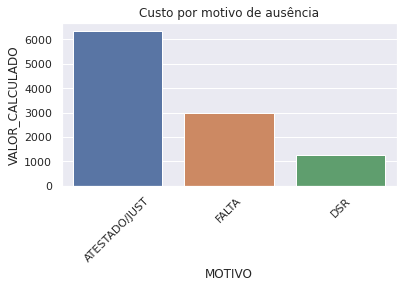

In [ ]:
df_motivo = df_lev.groupby(['MOTIVO']).sum().reset_index()
df_motivo = df_motivo[['MOTIVO', 'VALOR_CALCULADO']]
df_motivo= df_motivo.sort_values(by=['VALOR_CALCULADO'], ascending=False)
plt.figure(figsize=(6,3))
plt.xticks(rotation = 45)
plt.title('Custo por motivo de ausência')
display(df_motivo)
sns.barplot(data=df_motivo, x='MOTIVO', y='VALOR_CALCULADO')